# Breast Cancer Classification Using Neural Network

This project is about breast cancer classification using neural network. For the case of dataset originaldataset which is created by Dr.Wolberg is divided into two dataset.

## Section-0 Data Collection

This project is done with dataset of Dr. William H. Wolberg, physician at the University of Wisconsin Hospital at Madison, Wisconsin, USA. Then dataset is divided into two csv file as dependent and independent data.

## Section-1 Data Preprocessing

In [2]:
# importin libraries
import tensorflow as tf

import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib notebook
%config InlineBackened.figure_format='retina'


In [3]:
# import dependent (y) and independent (x) data
df1 = pd.read_csv('X_data.csv')
df2 = pd.read_csv('Y_data.csv')

In [4]:
# scale the data
df1 = preprocessing.scale(df1)

In [5]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

## Section-2 Neural Networks

In [6]:
# define a logistic regression model
model = Sequential()
model.add(Dense(16,input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [7]:
# pass several parameters to 'EarlyStopping' function 
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# fit model over 2000 iterations with earlystopper and assign history
history = model.fit(x_train, y_train, epochs=2000, validation_split=0.15, verbose=0, callbacks = [earlystopper])
history_dict= history.history

Epoch 00064: early stopping


<IPython.core.display.Javascript object>


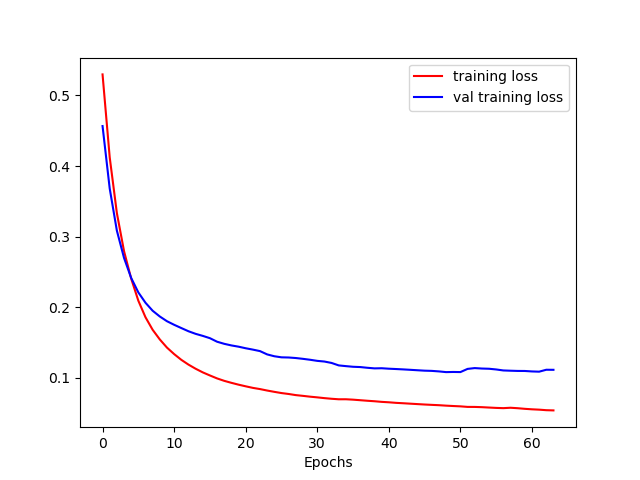

Text(0.5, 0, 'Epochs')

In [8]:
# plot training loss and validation split loss over the epochs
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'r',label='training loss')
plt.plot(val_loss_values,'b', label='val training loss')
plt.legend()
plt.xlabel('Epochs')

<IPython.core.display.Javascript object>


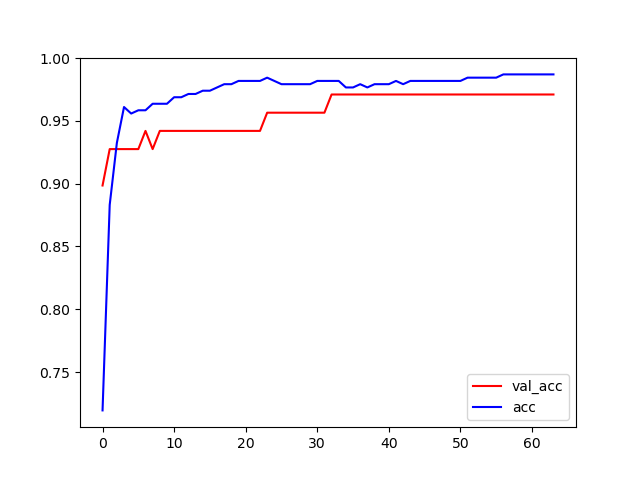

In [9]:
# plot accuracy over the epochs
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.figure()
plt.plot(val_accuracy_values, '-r',label='val_acc')
plt.plot(accuracy_values, '-b', label='acc')
plt.legend()

In [10]:
# calculate loss and accuracy of testing data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss: ', loss)
print('Test Accuracy: ', accuracy)

4/4 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9912
Test loss:  0.0449579656124115
Test Accuracy:  0.9912280440330505


In [11]:
# AUC score of testing data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9996537396121883


<IPython.core.display.Javascript object>


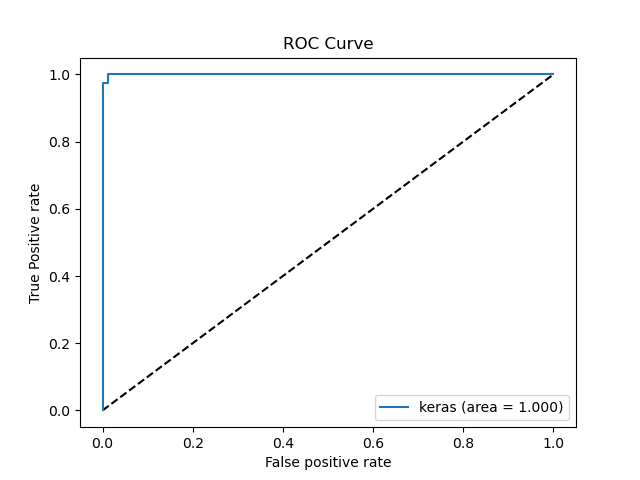

In [12]:
# ROC curve of testing data
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [13]:
# AUC score of training data
y_train_pred = model.predict(x_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9968321230946455


<IPython.core.display.Javascript object>


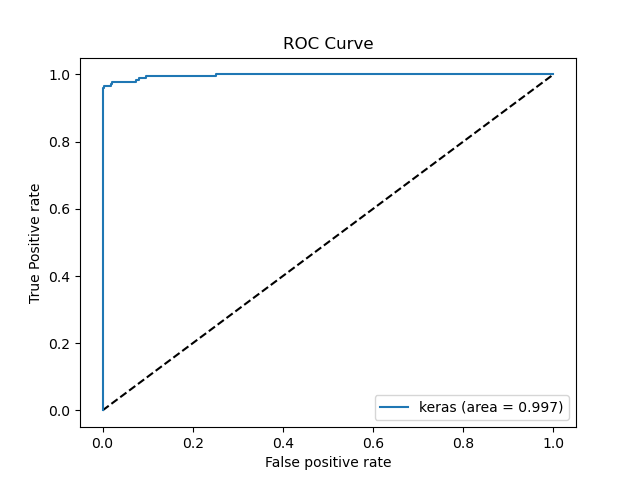

In [14]:
# ROC curve of training data
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [15]:
# making y_train categorical
y_train_cat = to_categorical(y_train)

In [16]:
y_train

,1
534,1
488,1
143,0
426,0
514,0
...,...
197,1
404,0
441,0
10,1


In [17]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [18]:
# defina a softmax regression model
model = Sequential()
model.add(Dense(16,input_shape=(30,), activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [19]:
# assign an earlystopper
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1,mode='auto')
history = model.fit(x_train, y_train_cat, epochs=2000, validation_split=0.15, verbose=1, callbacks=[earlystopper])
history_dict=history.history


Epoch 1/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.6878 - accuracy: 0.5896 - val_loss: 0.6938 - val_accuracy: 0.5942
Epoch 2/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6078 - val_loss: 0.6914 - val_accuracy: 0.6377
Epoch 3/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.6468 - val_loss: 0.6892 - val_accuracy: 0.6522
Epoch 4/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.6649 - val_loss: 0.6871 - val_accuracy: 0.6667
Epoch 5/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.6779 - val_loss: 0.6849 - val_accuracy: 0.6667
Epoch 6/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.6883 - val_loss: 0.6828 - val_accuracy: 0.6667
Epoch 7/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6987 - val_loss: 0.6805 - val_accuracy: 0.6812
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.8675 - val_loss: 0.5901 - val_accuracy: 0.8261
Epoch 59/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.8701 - val_loss: 0.5885 - val_accuracy: 0.8261
Epoch 60/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.8701 - val_loss: 0.5870 - val_accuracy: 0.8261
Epoch 61/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.8753 - val_loss: 0.5855 - val_accuracy: 0.8261
Epoch 62/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.8779 - val_loss: 0.5840 - val_accuracy: 0.8261
Epoch 63/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.8779 - val_loss: 0.5825 - val_accuracy: 0.8261
Epoch 64/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.8831 - val_loss: 0.5809 - val_accuracy: 0.8406
Epoch 65/2000

13/13 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.9195 - val_loss: 0.5119 - val_accuracy: 0.8841
Epoch 116/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.9221 - val_loss: 0.5106 - val_accuracy: 0.8841
Epoch 117/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.9221 - val_loss: 0.5094 - val_accuracy: 0.8841
Epoch 118/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.9221 - val_loss: 0.5081 - val_accuracy: 0.8841
Epoch 119/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.9221 - val_loss: 0.5068 - val_accuracy: 0.8841
Epoch 120/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.9221 - val_loss: 0.5055 - val_accuracy: 0.8841
Epoch 121/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.9247 - val_loss: 0.5043 - val_accuracy: 0.8841
Epoch 1

Epoch 172/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.9481 - val_loss: 0.4484 - val_accuracy: 0.8986
Epoch 173/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.9481 - val_loss: 0.4475 - val_accuracy: 0.8986
Epoch 174/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.9481 - val_loss: 0.4465 - val_accuracy: 0.8986
Epoch 175/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.9481 - val_loss: 0.4455 - val_accuracy: 0.8986
Epoch 176/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.9481 - val_loss: 0.4445 - val_accuracy: 0.8986
Epoch 177/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.9481 - val_loss: 0.4436 - val_accuracy: 0.8986
Epoch 178/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.9506 - val_loss: 0.4426 - val_accuracy:

Epoch 229/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.9558 - val_loss: 0.3990 - val_accuracy: 0.8986
Epoch 230/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.9558 - val_loss: 0.3982 - val_accuracy: 0.8986
Epoch 231/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.9558 - val_loss: 0.3975 - val_accuracy: 0.8986
Epoch 232/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.9558 - val_loss: 0.3968 - val_accuracy: 0.8986
Epoch 233/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.9558 - val_loss: 0.3961 - val_accuracy: 0.8986
Epoch 234/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.9558 - val_loss: 0.3953 - val_accuracy: 0.8986
Epoch 235/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.9558 - val_loss: 0.3946 - val_accuracy:

Epoch 286/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.9584 - val_loss: 0.3600 - val_accuracy: 0.8986
Epoch 287/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.9584 - val_loss: 0.3594 - val_accuracy: 0.8986
Epoch 288/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.9610 - val_loss: 0.3588 - val_accuracy: 0.8986
Epoch 289/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.9584 - val_loss: 0.3582 - val_accuracy: 0.8986
Epoch 290/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.9584 - val_loss: 0.3576 - val_accuracy: 0.8986
Epoch 291/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.9584 - val_loss: 0.3570 - val_accuracy: 0.8986
Epoch 292/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.9584 - val_loss: 0.3564 - val_accuracy:

Epoch 343/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2954 - accuracy: 0.9636 - val_loss: 0.3272 - val_accuracy: 0.9275
Epoch 344/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9636 - val_loss: 0.3267 - val_accuracy: 0.9420
Epoch 345/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.9662 - val_loss: 0.3262 - val_accuracy: 0.9420
Epoch 346/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.9662 - val_loss: 0.3257 - val_accuracy: 0.9420
Epoch 347/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.9662 - val_loss: 0.3252 - val_accuracy: 0.9420
Epoch 348/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.9662 - val_loss: 0.3246 - val_accuracy: 0.9420
Epoch 349/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.9662 - val_loss: 0.3241 - val_accuracy:

Epoch 400/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9662 - val_loss: 0.2995 - val_accuracy: 0.9420
Epoch 401/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.9662 - val_loss: 0.2990 - val_accuracy: 0.9420
Epoch 402/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.9662 - val_loss: 0.2985 - val_accuracy: 0.9420
Epoch 403/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2641 - accuracy: 0.9662 - val_loss: 0.2980 - val_accuracy: 0.9420
Epoch 404/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.9662 - val_loss: 0.2976 - val_accuracy: 0.9420
Epoch 405/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9662 - val_loss: 0.2971 - val_accuracy: 0.9420
Epoch 406/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.9662 - val_loss: 0.2967 - val_accuracy:

Epoch 457/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9714 - val_loss: 0.2751 - val_accuracy: 0.9420
Epoch 458/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9714 - val_loss: 0.2748 - val_accuracy: 0.9420
Epoch 459/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9714 - val_loss: 0.2744 - val_accuracy: 0.9420
Epoch 460/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9714 - val_loss: 0.2740 - val_accuracy: 0.9420
Epoch 461/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 0.9714 - val_loss: 0.2736 - val_accuracy: 0.9420
Epoch 462/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9714 - val_loss: 0.2732 - val_accuracy: 0.9420
Epoch 463/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9740 - val_loss: 0.2728 - val_accuracy:

Epoch 514/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9766 - val_loss: 0.2535 - val_accuracy: 0.9420
Epoch 515/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9766 - val_loss: 0.2532 - val_accuracy: 0.9420
Epoch 516/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9766 - val_loss: 0.2528 - val_accuracy: 0.9420
Epoch 517/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9766 - val_loss: 0.2524 - val_accuracy: 0.9420
Epoch 518/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9766 - val_loss: 0.2521 - val_accuracy: 0.9420
Epoch 519/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9766 - val_loss: 0.2517 - val_accuracy: 0.9420
Epoch 520/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9766 - val_loss: 0.2513 - val_accuracy:

Epoch 571/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9766 - val_loss: 0.2338 - val_accuracy: 0.9420
Epoch 572/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9766 - val_loss: 0.2335 - val_accuracy: 0.9420
Epoch 573/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9766 - val_loss: 0.2332 - val_accuracy: 0.9420
Epoch 574/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9766 - val_loss: 0.2329 - val_accuracy: 0.9420
Epoch 575/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9766 - val_loss: 0.2326 - val_accuracy: 0.9420
Epoch 576/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9766 - val_loss: 0.2323 - val_accuracy: 0.9420
Epoch 577/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.9766 - val_loss: 0.2320 - val_accuracy:

Epoch 628/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1821 - accuracy: 0.9792 - val_loss: 0.2165 - val_accuracy: 0.9565
Epoch 629/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9792 - val_loss: 0.2162 - val_accuracy: 0.9565
Epoch 630/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9766 - val_loss: 0.2159 - val_accuracy: 0.9565
Epoch 631/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9766 - val_loss: 0.2157 - val_accuracy: 0.9565
Epoch 632/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.9792 - val_loss: 0.2154 - val_accuracy: 0.9565
Epoch 633/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9766 - val_loss: 0.2151 - val_accuracy: 0.9565
Epoch 634/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9766 - val_loss: 0.2148 - val_accuracy:

Epoch 685/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9766 - val_loss: 0.2007 - val_accuracy: 0.9565
Epoch 686/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9766 - val_loss: 0.2005 - val_accuracy: 0.9565
Epoch 687/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9792 - val_loss: 0.2002 - val_accuracy: 0.9565
Epoch 688/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9792 - val_loss: 0.2000 - val_accuracy: 0.9565
Epoch 689/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9792 - val_loss: 0.1997 - val_accuracy: 0.9565
Epoch 690/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9792 - val_loss: 0.1995 - val_accuracy: 0.9565
Epoch 691/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9792 - val_loss: 0.1992 - val_accuracy:

Epoch 742/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9792 - val_loss: 0.1871 - val_accuracy: 0.9565
Epoch 743/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9792 - val_loss: 0.1868 - val_accuracy: 0.9565
Epoch 744/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9792 - val_loss: 0.1866 - val_accuracy: 0.9565
Epoch 745/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.9792 - val_loss: 0.1864 - val_accuracy: 0.9565
Epoch 746/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1547 - accuracy: 0.9792 - val_loss: 0.1862 - val_accuracy: 0.9565
Epoch 747/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9792 - val_loss: 0.1859 - val_accuracy: 0.9565
Epoch 748/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.9792 - val_loss: 0.1857 - val_accuracy:

Epoch 799/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1443 - accuracy: 0.9792 - val_loss: 0.1743 - val_accuracy: 0.9710
Epoch 800/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1442 - accuracy: 0.9792 - val_loss: 0.1741 - val_accuracy: 0.9710
Epoch 801/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9792 - val_loss: 0.1738 - val_accuracy: 0.9710
Epoch 802/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9792 - val_loss: 0.1735 - val_accuracy: 0.9710
Epoch 803/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9792 - val_loss: 0.1733 - val_accuracy: 0.9710
Epoch 804/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1434 - accuracy: 0.9792 - val_loss: 0.1733 - val_accuracy: 0.9710
Epoch 805/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.9792 - val_loss: 0.1732 - val_accuracy:

Epoch 856/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9792 - val_loss: 0.1627 - val_accuracy: 0.9710
Epoch 857/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9792 - val_loss: 0.1625 - val_accuracy: 0.9710
Epoch 858/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1341 - accuracy: 0.9792 - val_loss: 0.1622 - val_accuracy: 0.9710
Epoch 859/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9792 - val_loss: 0.1620 - val_accuracy: 0.9710
Epoch 860/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9792 - val_loss: 0.1618 - val_accuracy: 0.9710
Epoch 861/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.9792 - val_loss: 0.1616 - val_accuracy: 0.9710
Epoch 862/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9792 - val_loss: 0.1614 - val_accuracy:

Epoch 913/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9792 - val_loss: 0.1522 - val_accuracy: 0.9710
Epoch 914/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.9792 - val_loss: 0.1521 - val_accuracy: 0.9710
Epoch 915/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1250 - accuracy: 0.9792 - val_loss: 0.1519 - val_accuracy: 0.9710
Epoch 916/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.9792 - val_loss: 0.1517 - val_accuracy: 0.9710
Epoch 917/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9792 - val_loss: 0.1516 - val_accuracy: 0.9710
Epoch 918/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1245 - accuracy: 0.9792 - val_loss: 0.1514 - val_accuracy: 0.9710
Epoch 919/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9792 - val_loss: 0.1512 - val_accuracy:

Epoch 970/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9792 - val_loss: 0.1431 - val_accuracy: 0.9710
Epoch 971/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1170 - accuracy: 0.9792 - val_loss: 0.1429 - val_accuracy: 0.9710
Epoch 972/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9792 - val_loss: 0.1427 - val_accuracy: 0.9710
Epoch 973/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9792 - val_loss: 0.1425 - val_accuracy: 0.9710
Epoch 974/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9792 - val_loss: 0.1423 - val_accuracy: 0.9710
Epoch 975/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9792 - val_loss: 0.1421 - val_accuracy: 0.9710
Epoch 976/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9792 - val_loss: 0.1420 - val_accuracy:

Epoch 1027/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9792 - val_loss: 0.1352 - val_accuracy: 0.9710
Epoch 1028/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9792 - val_loss: 0.1350 - val_accuracy: 0.9710
Epoch 1029/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9792 - val_loss: 0.1349 - val_accuracy: 0.9710
Epoch 1030/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9792 - val_loss: 0.1348 - val_accuracy: 0.9710
Epoch 1031/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9792 - val_loss: 0.1346 - val_accuracy: 0.9710
Epoch 1032/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1094 - accuracy: 0.9792 - val_loss: 0.1345 - val_accuracy: 0.9710
Epoch 1033/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9792 - val_loss: 0.1344 - val_ac

13/13 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.9792 - val_loss: 0.1279 - val_accuracy: 0.9710
Epoch 1084/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.9792 - val_loss: 0.1278 - val_accuracy: 0.9710
Epoch 1085/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9792 - val_loss: 0.1276 - val_accuracy: 0.9710
Epoch 1086/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9792 - val_loss: 0.1275 - val_accuracy: 0.9710
Epoch 1087/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9792 - val_loss: 0.1277 - val_accuracy: 0.9710
Epoch 1088/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9792 - val_loss: 0.1276 - val_accuracy: 0.9710
Epoch 1089/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9792 - val_loss: 0.1275 - val_accuracy: 0.9710
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9792 - val_loss: 0.1216 - val_accuracy: 0.9710
Epoch 1140/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9792 - val_loss: 0.1215 - val_accuracy: 0.9710
Epoch 1141/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9792 - val_loss: 0.1213 - val_accuracy: 0.9710
Epoch 1142/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9792 - val_loss: 0.1212 - val_accuracy: 0.9710
Epoch 1143/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9792 - val_loss: 0.1212 - val_accuracy: 0.9710
Epoch 1144/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9792 - val_loss: 0.1212 - val_accuracy: 0.9710
Epoch 1145/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9792 - val_loss: 0.1211 - val_accuracy: 0.9710
E

13/13 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9792 - val_loss: 0.1156 - val_accuracy: 0.9710
Epoch 1196/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9792 - val_loss: 0.1155 - val_accuracy: 0.9710
Epoch 1197/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9792 - val_loss: 0.1155 - val_accuracy: 0.9710
Epoch 1198/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.9792 - val_loss: 0.1153 - val_accuracy: 0.9710
Epoch 1199/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9792 - val_loss: 0.1152 - val_accuracy: 0.9710
Epoch 1200/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9792 - val_loss: 0.1151 - val_accuracy: 0.9710
Epoch 1201/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9792 - val_loss: 0.1150 - val_accuracy: 0.9710
E

13/13 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9792 - val_loss: 0.1101 - val_accuracy: 0.9710
Epoch 1252/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9792 - val_loss: 0.1101 - val_accuracy: 0.9710
Epoch 1253/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9792 - val_loss: 0.1101 - val_accuracy: 0.9710
Epoch 1254/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9818 - val_loss: 0.1103 - val_accuracy: 0.9710
Epoch 1255/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9818 - val_loss: 0.1103 - val_accuracy: 0.9710
Epoch 1256/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9818 - val_loss: 0.1104 - val_accuracy: 0.9710
Epoch 1257/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9818 - val_loss: 0.1103 - val_accuracy: 0.9710
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9870 - val_loss: 0.1060 - val_accuracy: 0.9710
Epoch 1308/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9870 - val_loss: 0.1060 - val_accuracy: 0.9710
Epoch 1309/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9870 - val_loss: 0.1059 - val_accuracy: 0.9710
Epoch 1310/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9870 - val_loss: 0.1058 - val_accuracy: 0.9710
Epoch 1311/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9870 - val_loss: 0.1057 - val_accuracy: 0.9710
Epoch 1312/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9870 - val_loss: 0.1056 - val_accuracy: 0.9710
Epoch 1313/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9870 - val_loss: 0.1054 - val_accuracy: 0.9710
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9870 - val_loss: 0.1008 - val_accuracy: 0.9855
Epoch 1364/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9870 - val_loss: 0.1007 - val_accuracy: 0.9855
Epoch 1365/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9870 - val_loss: 0.1007 - val_accuracy: 0.9855
Epoch 1366/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9870 - val_loss: 0.1006 - val_accuracy: 0.9855
Epoch 1367/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9870 - val_loss: 0.1005 - val_accuracy: 0.9855
Epoch 1368/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9870 - val_loss: 0.1004 - val_accuracy: 0.9855
Epoch 1369/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0806 - accuracy: 0.9870 - val_loss: 0.1003 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9870 - val_loss: 0.0969 - val_accuracy: 0.9855
Epoch 1420/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9870 - val_loss: 0.0969 - val_accuracy: 0.9855
Epoch 1421/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0777 - accuracy: 0.9870 - val_loss: 0.0968 - val_accuracy: 0.9855
Epoch 1422/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9870 - val_loss: 0.0967 - val_accuracy: 0.9855
Epoch 1423/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9870 - val_loss: 0.0967 - val_accuracy: 0.9855
Epoch 1424/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9870 - val_loss: 0.0966 - val_accuracy: 0.9855
Epoch 1425/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9870 - val_loss: 0.0965 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9870 - val_loss: 0.0927 - val_accuracy: 0.9855
Epoch 1476/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9870 - val_loss: 0.0926 - val_accuracy: 0.9855
Epoch 1477/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9870 - val_loss: 0.0925 - val_accuracy: 0.9855
Epoch 1478/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9870 - val_loss: 0.0924 - val_accuracy: 0.9855
Epoch 1479/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9870 - val_loss: 0.0925 - val_accuracy: 0.9855
Epoch 1480/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9870 - val_loss: 0.0924 - val_accuracy: 0.9855
Epoch 1481/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9870 - val_loss: 0.0923 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9896 - val_loss: 0.0882 - val_accuracy: 0.9855
Epoch 1532/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9896 - val_loss: 0.0882 - val_accuracy: 0.9855
Epoch 1533/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9896 - val_loss: 0.0881 - val_accuracy: 0.9855
Epoch 1534/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9896 - val_loss: 0.0881 - val_accuracy: 0.9855
Epoch 1535/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9896 - val_loss: 0.0880 - val_accuracy: 0.9855
Epoch 1536/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9896 - val_loss: 0.0879 - val_accuracy: 0.9855
Epoch 1537/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9896 - val_loss: 0.0881 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9922 - val_loss: 0.0851 - val_accuracy: 0.9855
Epoch 1588/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9922 - val_loss: 0.0850 - val_accuracy: 0.9855
Epoch 1589/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9922 - val_loss: 0.0849 - val_accuracy: 0.9855
Epoch 1590/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9922 - val_loss: 0.0849 - val_accuracy: 0.9855
Epoch 1591/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9922 - val_loss: 0.0848 - val_accuracy: 0.9855
Epoch 1592/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9922 - val_loss: 0.0847 - val_accuracy: 0.9855
Epoch 1593/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9922 - val_loss: 0.0847 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9922 - val_loss: 0.0807 - val_accuracy: 0.9855
Epoch 1644/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9922 - val_loss: 0.0806 - val_accuracy: 0.9855
Epoch 1645/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9922 - val_loss: 0.0805 - val_accuracy: 0.9855
Epoch 1646/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9922 - val_loss: 0.0804 - val_accuracy: 0.9855
Epoch 1647/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9922 - val_loss: 0.0803 - val_accuracy: 0.9855
Epoch 1648/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9922 - val_loss: 0.0802 - val_accuracy: 0.9855
Epoch 1649/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9922 - val_loss: 0.0802 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9922 - val_loss: 0.0769 - val_accuracy: 0.9855
Epoch 1700/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9922 - val_loss: 0.0769 - val_accuracy: 0.9855
Epoch 1701/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9922 - val_loss: 0.0768 - val_accuracy: 0.9855
Epoch 1702/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9922 - val_loss: 0.0767 - val_accuracy: 0.9855
Epoch 1703/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9922 - val_loss: 0.0767 - val_accuracy: 0.9855
Epoch 1704/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9922 - val_loss: 0.0766 - val_accuracy: 0.9855
Epoch 1705/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9922 - val_loss: 0.0765 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9922 - val_loss: 0.0727 - val_accuracy: 0.9855
Epoch 1756/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0614 - accuracy: 0.9922 - val_loss: 0.0727 - val_accuracy: 0.9855
Epoch 1757/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0614 - accuracy: 0.9922 - val_loss: 0.0727 - val_accuracy: 0.9855
Epoch 1758/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9922 - val_loss: 0.0726 - val_accuracy: 0.9855
Epoch 1759/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9922 - val_loss: 0.0725 - val_accuracy: 0.9855
Epoch 1760/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9922 - val_loss: 0.0725 - val_accuracy: 0.9855
Epoch 1761/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9922 - val_loss: 0.0724 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9922 - val_loss: 0.0689 - val_accuracy: 0.9855
Epoch 1812/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9922 - val_loss: 0.0689 - val_accuracy: 0.9855
Epoch 1813/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9922 - val_loss: 0.0689 - val_accuracy: 0.9855
Epoch 1814/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9922 - val_loss: 0.0688 - val_accuracy: 0.9855
Epoch 1815/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9922 - val_loss: 0.0688 - val_accuracy: 0.9855
Epoch 1816/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9922 - val_loss: 0.0687 - val_accuracy: 0.9855
Epoch 1817/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9922 - val_loss: 0.0685 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9922 - val_loss: 0.0665 - val_accuracy: 0.9855
Epoch 1868/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9922 - val_loss: 0.0664 - val_accuracy: 0.9855
Epoch 1869/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9922 - val_loss: 0.0664 - val_accuracy: 0.9855
Epoch 1870/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9922 - val_loss: 0.0663 - val_accuracy: 0.9855
Epoch 1871/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9922 - val_loss: 0.0663 - val_accuracy: 0.9855
Epoch 1872/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9922 - val_loss: 0.0662 - val_accuracy: 0.9855
Epoch 1873/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9922 - val_loss: 0.0661 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9922 - val_loss: 0.0641 - val_accuracy: 0.9855
Epoch 1924/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9922 - val_loss: 0.0640 - val_accuracy: 0.9855
Epoch 1925/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9922 - val_loss: 0.0639 - val_accuracy: 0.9855
Epoch 1926/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9922 - val_loss: 0.0638 - val_accuracy: 0.9855
Epoch 1927/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9922 - val_loss: 0.0638 - val_accuracy: 0.9855
Epoch 1928/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9922 - val_loss: 0.0637 - val_accuracy: 0.9855
Epoch 1929/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9922 - val_loss: 0.0637 - val_accuracy: 0.9855
E

13/13 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9922 - val_loss: 0.0606 - val_accuracy: 0.9855
Epoch 1980/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9922 - val_loss: 0.0605 - val_accuracy: 0.9855
Epoch 1981/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9922 - val_loss: 0.0606 - val_accuracy: 0.9855
Epoch 1982/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9922 - val_loss: 0.0605 - val_accuracy: 0.9855
Epoch 1983/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9922 - val_loss: 0.0605 - val_accuracy: 0.9855
Epoch 1984/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9922 - val_loss: 0.0604 - val_accuracy: 0.9855
Epoch 1985/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9922 - val_loss: 0.0604 - val_accuracy: 0.9855
E

<IPython.core.display.Javascript object>


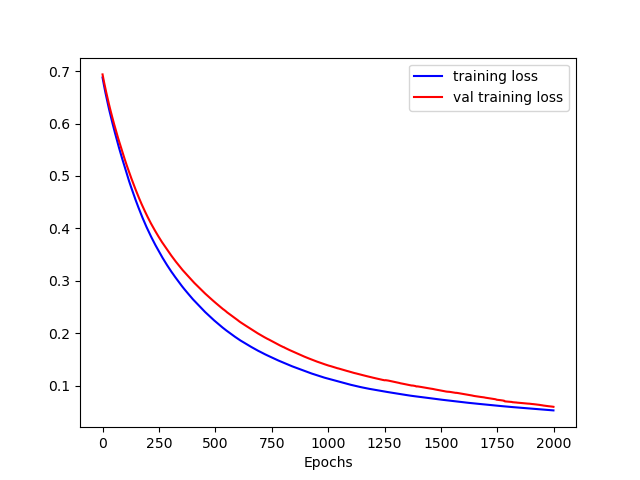

Text(0.5, 0, 'Epochs')

In [20]:
# plot training loss and validation split loss 
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.xlabel('Epochs')

<IPython.core.display.Javascript object>


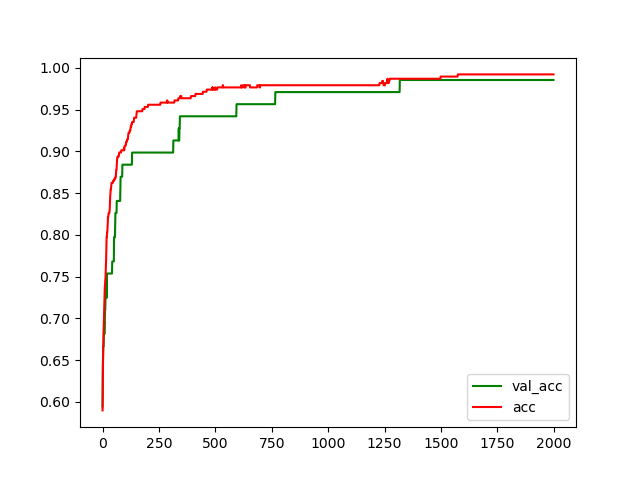

In [21]:
# plot accuracy
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.figure()
plt.plot(val_accuracy_values, '-g', label='val_acc')
plt.plot(accuracy_values, '-r', label='acc')
plt.legend()

In [22]:
# calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, accuracy = model.evaluate(x_test, y_test_cat)
print('Test loss: ', loss)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9737
Test loss:  0.07349961251020432
Test Accuracy: 0.9736841917037964


In [23]:
# AUC score of testing data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.997229916897507


<IPython.core.display.Javascript object>


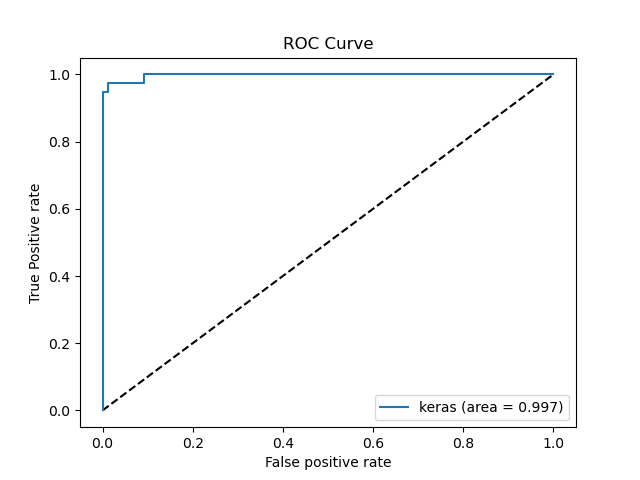

In [24]:
# ROC curve of testing data
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [25]:
# AUC score of training data
y_train_pred = model.predict(x_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.995618455968568


<IPython.core.display.Javascript object>


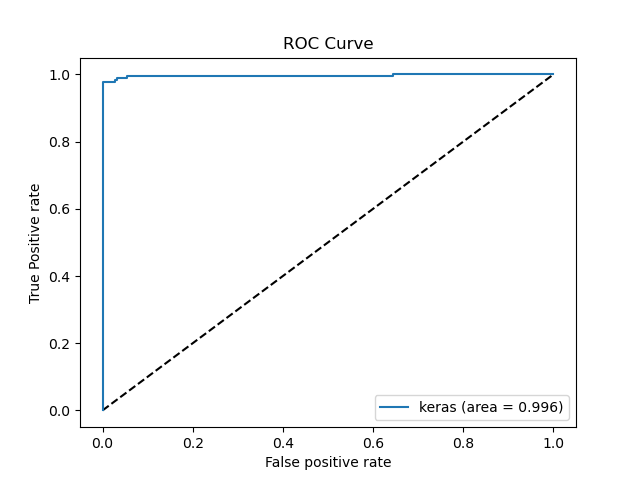

In [26]:
# ROC curve of training data
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [27]:
# define a deep softmax regression model
model = Sequential()
model.add(Dense(16,input_shape=(30,), activation='softmax'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [28]:
# assign an earlystopper
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1,mode='auto')
history = model.fit(x_train, y_train_cat, epochs=3000, validation_split=0.15, verbose=1, callbacks=[earlystopper])
history_dict=history.history

Epoch 1/3000
13/13 [==============================] - 0s 11ms/step - loss: 0.7105 - accuracy: 0.3844 - val_loss: 0.7087 - val_accuracy: 0.3623
Epoch 2/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.3844 - val_loss: 0.7004 - val_accuracy: 0.3623
Epoch 3/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.3844 - val_loss: 0.6935 - val_accuracy: 0.3623
Epoch 4/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5740 - val_loss: 0.6893 - val_accuracy: 0.6377
Epoch 5/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.6156 - val_loss: 0.6845 - val_accuracy: 0.6377
Epoch 6/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.6156 - val_loss: 0.6801 - val_accuracy: 0.6377
Epoch 7/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.6156 - val_loss: 0.6778 - val_accuracy: 0.6377
Epoch

13/13 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.6156 - val_loss: 0.5379 - val_accuracy: 0.6377
Epoch 59/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.6156 - val_loss: 0.5280 - val_accuracy: 0.6377
Epoch 60/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.6156 - val_loss: 0.5174 - val_accuracy: 0.6377
Epoch 61/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.6156 - val_loss: 0.5065 - val_accuracy: 0.6377
Epoch 62/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.7169 - val_loss: 0.4954 - val_accuracy: 0.8986
Epoch 63/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.9662 - val_loss: 0.4842 - val_accuracy: 0.9275
Epoch 64/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.9792 - val_loss: 0.4729 - val_accuracy: 0.9420
Epoch 65/3000

13/13 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9948 - val_loss: 0.1232 - val_accuracy: 0.9855
Epoch 116/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.9948 - val_loss: 0.1212 - val_accuracy: 0.9855
Epoch 117/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9948 - val_loss: 0.1193 - val_accuracy: 0.9855
Epoch 118/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.9948 - val_loss: 0.1174 - val_accuracy: 0.9855
Epoch 119/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0946 - accuracy: 0.9948 - val_loss: 0.1157 - val_accuracy: 0.9855
Epoch 120/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9948 - val_loss: 0.1140 - val_accuracy: 0.9855
Epoch 121/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9948 - val_loss: 0.1124 - val_accuracy: 0.9855
Epoch 1

Epoch 172/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9948 - val_loss: 0.0801 - val_accuracy: 0.9855
Epoch 173/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9948 - val_loss: 0.0798 - val_accuracy: 0.9855
Epoch 174/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9948 - val_loss: 0.0796 - val_accuracy: 0.9855
Epoch 175/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9948 - val_loss: 0.0794 - val_accuracy: 0.9855
Epoch 176/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9948 - val_loss: 0.0792 - val_accuracy: 0.9855
Epoch 177/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9948 - val_loss: 0.0790 - val_accuracy: 0.9855
Epoch 178/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9948 - val_loss: 0.0789 - val_accuracy:

Epoch 229/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9948 - val_loss: 0.0742 - val_accuracy: 0.9855
Epoch 230/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9948 - val_loss: 0.0742 - val_accuracy: 0.9855
Epoch 231/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9948 - val_loss: 0.0742 - val_accuracy: 0.9855
Epoch 232/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9948 - val_loss: 0.0741 - val_accuracy: 0.9855
Epoch 233/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9948 - val_loss: 0.0741 - val_accuracy: 0.9855
Epoch 234/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9948 - val_loss: 0.0741 - val_accuracy: 0.9855
Epoch 235/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9948 - val_loss: 0.0741 - val_accuracy:

Epoch 286/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9948 - val_loss: 0.0738 - val_accuracy: 0.9855
Epoch 287/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9948 - val_loss: 0.0738 - val_accuracy: 0.9855
Epoch 288/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9948 - val_loss: 0.0738 - val_accuracy: 0.9855
Epoch 289/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9948 - val_loss: 0.0738 - val_accuracy: 0.9855
Epoch 290/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9948 - val_loss: 0.0738 - val_accuracy: 0.9855
Epoch 291/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9948 - val_loss: 0.0738 - val_accuracy: 0.9855
Epoch 292/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9948 - val_loss: 0.0738 - val_accuracy:

<IPython.core.display.Javascript object>


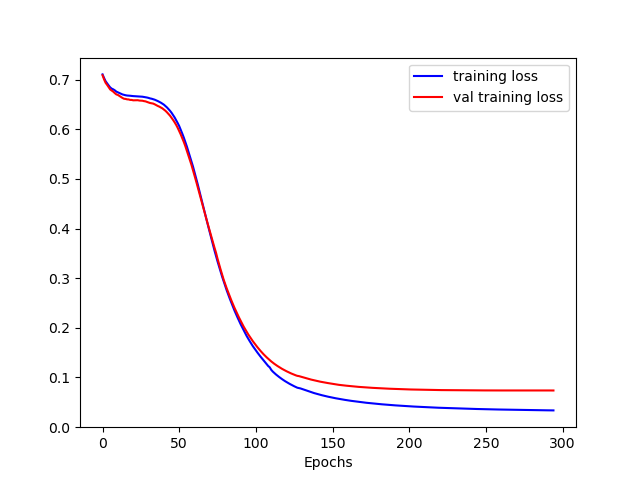

Text(0.5, 0, 'Epochs')

In [29]:
# plot training loss and validation split loss 
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.xlabel('Epochs')

<IPython.core.display.Javascript object>


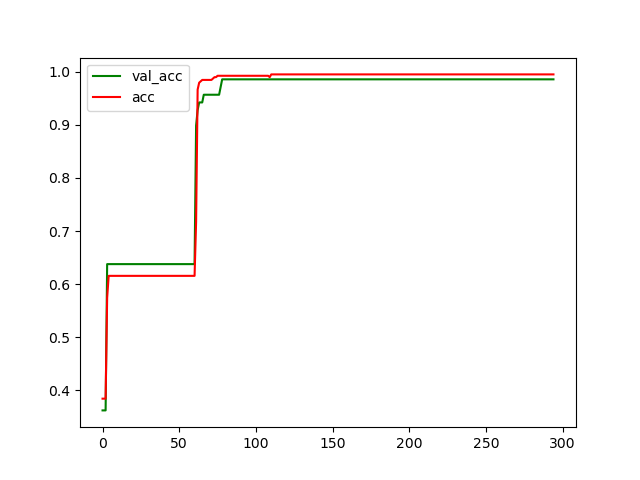

In [30]:
# plot accuracy
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.figure()
plt.plot(val_accuracy_values, '-g', label='val_acc')
plt.plot(accuracy_values, '-r', label='acc')
plt.legend()

In [31]:
# calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, accuracy = model.evaluate(x_test, y_test_cat)
print('Test loss: ', loss)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.9737
Test loss:  0.12888284027576447
Test Accuracy: 0.9736841917037964


In [32]:
# AUC score of testing data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9982686980609417


<IPython.core.display.Javascript object>


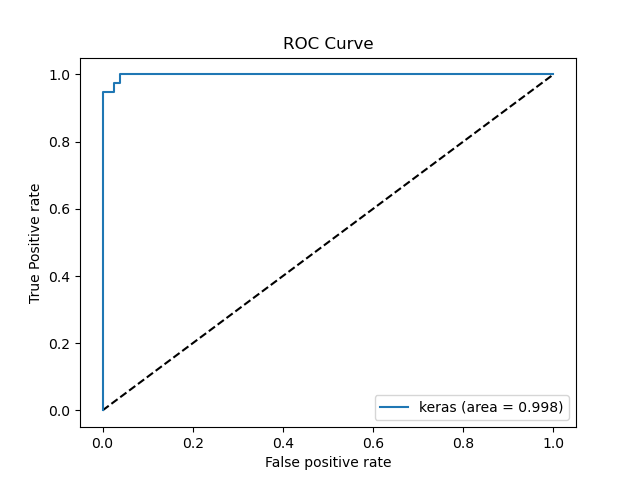

In [33]:
# ROC curve of testing data
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [34]:
# AUC score of training data
y_train_pred = model.predict(x_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9954641762491515


<IPython.core.display.Javascript object>


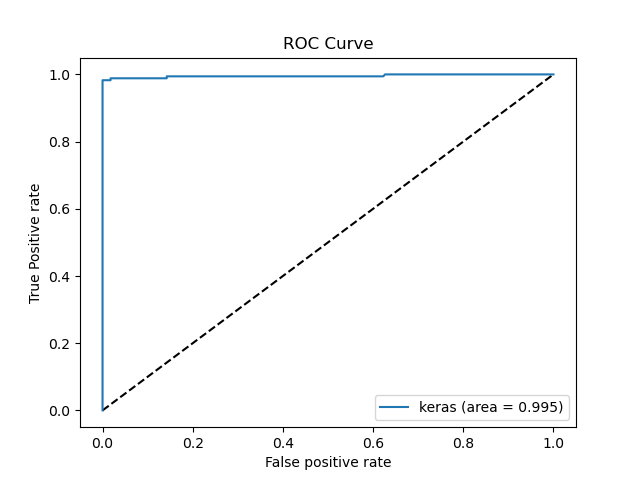

In [35]:
# ROC curve of training data
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [36]:
# define a deep softmax regression
model = Sequential()
model.add(Dense(16,input_shape=(30,), activation='softmax'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [37]:
# store the initial random weights
initial_weights = model.get_weights()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [39]:
train_sizes = (len(x_train) * np.linspace(0.1, 0.999, 4)).astype(int)
train_sizes

array([ 45, 181, 317, 453])

In [42]:
train_scores = []
test_scores = []
for train_size in train_sizes:
    x_train_frac, __, y_train_frac, __ = \
    train_test_split(x_train, y_train, train_size= train_size)
    # make y_train_frac categorical
    y_train_frac = to_categorical(y_train_frac)
    
    # reset the weights of the model
    model.set_weights(initial_weights)
    h = model.fit(x_train_frac, y_train_frac, verbose=1, epochs=1000, callbacks=[EarlyStopping(monitor='loss', patience=20)])
    r = model.evaluate(x_train_frac, y_train_frac, verbose=1)
    train_scores.append(r[-1])
    y_test_cat = to_categorical(y_test)
    e = model.evaluate(x_test, y_test_cat, verbose=1)
    test_scores.append(e[-1])
    print('Done size: ', train_size)

Epoch 1/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4667
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4667
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.4667
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4667
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4667
Epoch 6/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4667
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4667
Epoch 9/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4667
Epoch 10/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4667
Epoch 11/1000
2/2 [

2/2 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5333
Epoch 84/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5333
Epoch 85/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5333
Epoch 86/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5333
Epoch 87/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5333
Epoch 88/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5333
Epoch 89/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5333
Epoch 90/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5333
Epoch 91/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5333
Epoch 92/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5333
Epoch 93/1000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5333
Epoch 166/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5333
Epoch 167/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5333
Epoch 168/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5333
Epoch 169/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5333
Epoch 170/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5333
Epoch 171/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5333
Epoch 172/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5333
Epoch 173/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5333
Epoch 174/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5333
Epoch 175/1000


2/2 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.5333
Epoch 248/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6348 - accuracy: 0.5333
Epoch 249/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.5333
Epoch 250/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.5333
Epoch 251/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.5333
Epoch 252/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.5333
Epoch 253/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6444
Epoch 254/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.9111
Epoch 255/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.9556
Epoch 256/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.9556
Epoch 257/1000


2/2 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 1.0000
Epoch 330/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 1.0000
Epoch 331/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 1.0000
Epoch 332/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4313 - accuracy: 1.0000
Epoch 333/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 1.0000
Epoch 334/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 1.0000
Epoch 335/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 1.0000
Epoch 336/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 1.0000
Epoch 337/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 1.0000
Epoch 338/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 1.0000
Epoch 339/1000


2/2 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 1.0000
Epoch 412/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 1.0000
Epoch 413/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 1.0000
Epoch 414/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 1.0000
Epoch 415/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 1.0000
Epoch 416/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 1.0000
Epoch 417/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2455 - accuracy: 1.0000
Epoch 418/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 1.0000
Epoch 419/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 1.0000
Epoch 420/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 1.0000
Epoch 421/1000


2/2 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 1.0000
Epoch 494/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 1.0000
Epoch 495/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1548 - accuracy: 1.0000
Epoch 496/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 1.0000
Epoch 497/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 1.0000
Epoch 498/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 1.0000
Epoch 499/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1514 - accuracy: 1.0000
Epoch 500/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 1.0000
Epoch 501/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1497 - accuracy: 1.0000
Epoch 502/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 1.0000
Epoch 503/1000


2/2 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 1.0000
Epoch 576/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 1.0000
Epoch 577/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 1.0000
Epoch 578/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 1.0000
Epoch 579/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 1.0000
Epoch 580/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 1.0000
Epoch 581/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 1.0000
Epoch 582/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 1.0000
Epoch 583/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 1.0000
Epoch 584/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 1.0000
Epoch 585/1000


2/2 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 1.0000
Epoch 658/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 1.0000
Epoch 659/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 1.0000
Epoch 660/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 1.0000
Epoch 661/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 1.0000
Epoch 662/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 1.0000
Epoch 663/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 1.0000
Epoch 664/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 1.0000
Epoch 665/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0689 - accuracy: 1.0000
Epoch 666/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 1.0000
Epoch 667/1000


2/2 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 1.0000
Epoch 740/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 1.0000
Epoch 741/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 1.0000
Epoch 742/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 1.0000
Epoch 743/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 1.0000
Epoch 744/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 1.0000
Epoch 745/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 1.0000
Epoch 746/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 1.0000
Epoch 747/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 1.0000
Epoch 748/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 1.0000
Epoch 749/1000


2/2 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 1.0000
Epoch 822/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 1.0000
Epoch 823/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 1.0000
Epoch 824/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 1.0000
Epoch 825/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 1.0000
Epoch 826/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 1.0000
Epoch 827/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 1.0000
Epoch 828/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 1.0000
Epoch 829/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 830/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 831/1000


2/2 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 1.0000
Epoch 904/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 905/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 1.0000
Epoch 906/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 1.0000
Epoch 907/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 1.0000
Epoch 908/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 1.0000
Epoch 909/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 1.0000
Epoch 910/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 1.0000
Epoch 911/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 912/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 913/1000


2/2 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 986/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 987/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 1.0000
Epoch 988/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 1.0000
Epoch 989/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 990/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 991/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 992/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 993/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 994/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 995/1000


6/6 [==============================] - 0s 1ms/step - loss: 0.5433 - accuracy: 0.6685
Epoch 66/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.6685
Epoch 67/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.5286 - accuracy: 0.6685
Epoch 68/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.6685
Epoch 69/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.6685
Epoch 70/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.5043 - accuracy: 0.6685
Epoch 71/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.6685
Epoch 72/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.6685
Epoch 73/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.6685
Epoch 74/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.6685
Epoch 75/1000
6/6 [=====

6/6 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9890
Epoch 148/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9890
Epoch 149/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9890
Epoch 150/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9890
Epoch 151/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9890
Epoch 152/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.9890
Epoch 153/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9890
Epoch 154/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9890
Epoch 155/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9890
Epoch 156/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9890
Epoch 157/1000


6/6 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9890
Epoch 230/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9890
Epoch 231/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9890
Epoch 232/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9890
Epoch 233/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9890
Epoch 234/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9890
Epoch 235/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9890
Epoch 236/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9890
Epoch 237/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 0.9890
Epoch 238/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9890
Epoch 239/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9890
Epoch 312/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9890
Epoch 313/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9890
Epoch 314/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9890
Epoch 315/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9890
Epoch 316/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9890
Epoch 317/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9890
Epoch 318/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9890
Epoch 319/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9890
Epoch 320/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9890
Epoch 321/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9890
Epoch 394/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9890
Epoch 395/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9890
Epoch 396/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9890
Epoch 397/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9890
Epoch 398/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9890
Epoch 399/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9890
Epoch 400/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9890
Epoch 401/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9890
Epoch 402/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9890
Epoch 403/1000


6/6 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9890
Epoch 476/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9890
Epoch 477/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9890
Epoch 478/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9890
Epoch 479/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9890
Epoch 480/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9890
Epoch 481/1000
6/6 [==============================] - 0s 985us/step - loss: 0.0593 - accuracy: 0.9890
Epoch 482/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9890
Epoch 483/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9890
Epoch 484/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9890
Epoch 485/100

6/6 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9890
Epoch 558/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9890
Epoch 559/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9890
Epoch 560/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9890
Epoch 561/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9890
Epoch 562/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9890
Epoch 563/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9890
Epoch 564/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9890
Epoch 565/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9890
Epoch 566/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9890
Epoch 567/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9890
Epoch 640/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9890
Epoch 641/1000
6/6 [==============================] - 0s 951us/step - loss: 0.0580 - accuracy: 0.9890
Epoch 642/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9890
Epoch 643/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9890
Epoch 644/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9890
Epoch 645/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9890
Epoch 646/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9890
Epoch 647/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9890
Epoch 648/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9890
Epoch 649/100

6/6 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 722/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 723/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 724/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 725/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 726/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 727/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 728/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 729/1000
6/6 [==============================] - 0s 978us/step - loss: 0.0576 - accuracy: 0.9890
Epoch 730/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 731/100

6/6 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9890
Epoch 804/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9890
Epoch 805/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9890
Epoch 806/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9890
Epoch 807/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9890
Epoch 808/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9890
Epoch 809/1000
6/6 [==============================] - 0s 953us/step - loss: 0.0573 - accuracy: 0.9890
Epoch 810/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9890
Epoch 811/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9890
Epoch 812/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9890
Epoch 813/100

6/6 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 886/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 887/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 888/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 889/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 890/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 891/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 892/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 893/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 894/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9890
Epoch 895/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 968/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 969/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 970/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 971/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 972/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 973/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 974/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 975/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 976/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9890
Epoch 977/1000


10/10 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9968
Epoch 47/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1686 - accuracy: 0.9968
Epoch 48/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9968
Epoch 49/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9968
Epoch 50/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9968
Epoch 51/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.9968
Epoch 52/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 0.9968
Epoch 53/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.9968
Epoch 54/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9968
Epoch 55/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9968
Epoc

Epoch 127/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 128/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 129/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 130/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 131/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 132/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 133/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 134/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 135/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 136/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0190

10/10 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 208/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 209/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 210/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 211/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 212/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 213/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 214/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 215/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 216/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 1.

10/10 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 288/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 289/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 290/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 291/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 292/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 293/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 294/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 295/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 296/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.

10/10 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 368/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 369/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 370/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 371/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 372/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 373/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 374/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 375/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 376/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.

10/10 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 448/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 449/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 450/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 451/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 452/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 453/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 454/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 455/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 456/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.

10/10 [==============================] - 0s 1ms/step - loss: 9.7438e-04 - accuracy: 1.0000
Epoch 528/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.6924e-04 - accuracy: 1.0000
Epoch 529/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.6415e-04 - accuracy: 1.0000
Epoch 530/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.5903e-04 - accuracy: 1.0000
Epoch 531/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.5403e-04 - accuracy: 1.0000
Epoch 532/1000
10/10 [==============================] - 0s 2ms/step - loss: 9.4902e-04 - accuracy: 1.0000
Epoch 533/1000
10/10 [==============================] - 0s 2ms/step - loss: 9.4407e-04 - accuracy: 1.0000
Epoch 534/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.3909e-04 - accuracy: 1.0000
Epoch 535/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.3417e-04 - accuracy: 1.0000
Epoch 536/1000
10/10 [==============================] - 0s 1m

10/10 [==============================] - 0s 1ms/step - loss: 6.5435e-04 - accuracy: 1.0000
Epoch 605/1000
10/10 [==============================] - 0s 1ms/step - loss: 6.5105e-04 - accuracy: 1.0000
Epoch 606/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.4774e-04 - accuracy: 1.0000
Epoch 607/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.4448e-04 - accuracy: 1.0000
Epoch 608/1000
10/10 [==============================] - 0s 1ms/step - loss: 6.4121e-04 - accuracy: 1.0000
Epoch 609/1000
10/10 [==============================] - 0s 1ms/step - loss: 6.3796e-04 - accuracy: 1.0000
Epoch 610/1000
10/10 [==============================] - 0s 961us/step - loss: 6.3475e-04 - accuracy: 1.0000
Epoch 611/1000
10/10 [==============================] - 0s 854us/step - loss: 6.3153e-04 - accuracy: 1.0000
Epoch 612/1000
10/10 [==============================] - 0s 906us/step - loss: 6.2836e-04 - accuracy: 1.0000
Epoch 613/1000
10/10 [==============================] -

10/10 [==============================] - 0s 1ms/step - loss: 4.4490e-04 - accuracy: 1.0000
Epoch 682/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.4272e-04 - accuracy: 1.0000
Epoch 683/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.4051e-04 - accuracy: 1.0000
Epoch 684/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.3834e-04 - accuracy: 1.0000
Epoch 685/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.3618e-04 - accuracy: 1.0000
Epoch 686/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.3406e-04 - accuracy: 1.0000
Epoch 687/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.3188e-04 - accuracy: 1.0000
Epoch 688/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.2975e-04 - accuracy: 1.0000
Epoch 689/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.2764e-04 - accuracy: 1.0000
Epoch 690/1000
10/10 [==============================] - 0s 1m

10/10 [==============================] - 0s 1ms/step - loss: 3.0486e-04 - accuracy: 1.0000
Epoch 759/1000
10/10 [==============================] - 0s 1ms/step - loss: 3.0339e-04 - accuracy: 1.0000
Epoch 760/1000
10/10 [==============================] - 0s 1ms/step - loss: 3.0190e-04 - accuracy: 1.0000
Epoch 761/1000
10/10 [==============================] - 0s 1ms/step - loss: 3.0044e-04 - accuracy: 1.0000
Epoch 762/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.9897e-04 - accuracy: 1.0000
Epoch 763/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.9753e-04 - accuracy: 1.0000
Epoch 764/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.9609e-04 - accuracy: 1.0000
Epoch 765/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.9465e-04 - accuracy: 1.0000
Epoch 766/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.9320e-04 - accuracy: 1.0000
Epoch 767/1000
10/10 [==============================] - 0s 1m

10/10 [==============================] - 0s 1ms/step - loss: 2.0996e-04 - accuracy: 1.0000
Epoch 836/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.0895e-04 - accuracy: 1.0000
Epoch 837/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.0794e-04 - accuracy: 1.0000
Epoch 838/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.0694e-04 - accuracy: 1.0000
Epoch 839/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.0595e-04 - accuracy: 1.0000
Epoch 840/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.0496e-04 - accuracy: 1.0000
Epoch 841/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.0398e-04 - accuracy: 1.0000
Epoch 842/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.0300e-04 - accuracy: 1.0000
Epoch 843/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.0203e-04 - accuracy: 1.0000
Epoch 844/1000
10/10 [==============================] - 0s 1m

10/10 [==============================] - 0s 1ms/step - loss: 1.4508e-04 - accuracy: 1.0000
Epoch 913/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.4438e-04 - accuracy: 1.0000
Epoch 914/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.4370e-04 - accuracy: 1.0000
Epoch 915/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.4301e-04 - accuracy: 1.0000
Epoch 916/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.4233e-04 - accuracy: 1.0000
Epoch 917/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.4165e-04 - accuracy: 1.0000
Epoch 918/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.4097e-04 - accuracy: 1.0000
Epoch 919/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.4030e-04 - accuracy: 1.0000
Epoch 920/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.3963e-04 - accuracy: 1.0000
Epoch 921/1000
10/10 [==============================] - 0s 1m

10/10 [==============================] - 0s 1ms/step - loss: 1.0046e-04 - accuracy: 1.0000
Epoch 990/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.9980e-05 - accuracy: 1.0000
Epoch 991/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.9509e-05 - accuracy: 1.0000
Epoch 992/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.9038e-05 - accuracy: 1.0000
Epoch 993/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.8572e-05 - accuracy: 1.0000
Epoch 994/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.8100e-05 - accuracy: 1.0000
Epoch 995/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.7633e-05 - accuracy: 1.0000
Epoch 996/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.7168e-05 - accuracy: 1.0000
Epoch 997/1000
10/10 [==============================] - 0s 1ms/step - loss: 9.6705e-05 - accuracy: 1.0000
Epoch 998/1000
10/10 [==============================] - 0s 1m

15/15 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9934
Epoch 68/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9934
Epoch 69/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9934
Epoch 70/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.9934
Epoch 71/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9934
Epoch 72/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9934
Epoch 73/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0568 - accuracy: 0.9934
Epoch 74/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9934
Epoch 75/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.9934
Epoch 76/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9934
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.9934
Epoch 148/1000
15/15 [==============================] - 0s 988us/step - loss: 0.0411 - accuracy: 0.9934
Epoch 149/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9934
Epoch 150/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9934
Epoch 151/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9934
Epoch 152/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9934
Epoch 153/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9934
Epoch 154/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9934
Epoch 155/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9934
Epoch 156/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 

15/15 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9956
Epoch 228/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9956
Epoch 229/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 0.9956
Epoch 230/1000
15/15 [==============================] - 0s 985us/step - loss: 0.0281 - accuracy: 0.9956
Epoch 231/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 0.9956
Epoch 232/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9956
Epoch 233/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 0.9956
Epoch 234/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9956
Epoch 235/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9956
Epoch 236/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 

15/15 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9956
Epoch 308/1000
15/15 [==============================] - 0s 911us/step - loss: 0.0271 - accuracy: 0.9956
Epoch 309/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9956
Epoch 310/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9956
Epoch 311/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9956
Epoch 312/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9956
Epoch 313/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9956
Epoch 314/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9956
Epoch 315/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9956
Epoch 316/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 

15/15 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9956
Epoch 388/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9956
Epoch 389/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9956
Epoch 390/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9956
Epoch 391/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9956
Epoch 392/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9956
Epoch 393/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9956
Epoch 394/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9956
Epoch 395/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9956
Epoch 396/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.

15/15 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9956
Epoch 468/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 469/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 470/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 471/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 472/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 473/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 474/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 475/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 476/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.

15/15 [==============================] - 0s 945us/step - loss: 0.0265 - accuracy: 0.9956
Epoch 548/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9956
Epoch 549/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 550/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9956
Epoch 551/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9956
Epoch 552/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9956
Epoch 553/1000
15/15 [==============================] - 0s 894us/step - loss: 0.0264 - accuracy: 0.9956
Epoch 554/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9956
Epoch 555/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9956
Epoch 556/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy

<IPython.core.display.Javascript object>


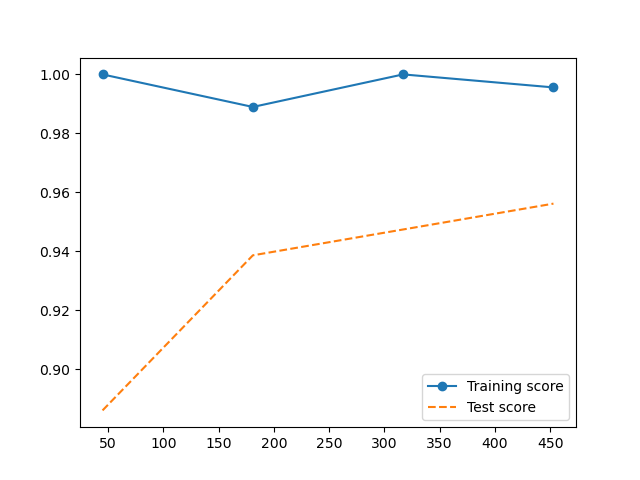

In [43]:
plt.figure()
plt.plot(train_sizes, train_scores, 'o-', label='Training score')
plt.plot(train_sizes, test_scores, '--', label='Test score')
plt.legend(loc='best')

In [44]:
# define a deep softmax regression model with dropout
model = Sequential()
model.add(Dense(16,input_shape=(30,), activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [45]:
# assign an earlystopper
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1,mode='auto')
history = model.fit(x_train, y_train_cat, epochs=3000, validation_split=0.1, shuffle = True, verbose=1, callbacks=[earlystopper])
history_dict=history.history

Epoch 1/3000
13/13 [==============================] - 0s 12ms/step - loss: 0.6946 - accuracy: 0.4926 - val_loss: 0.6894 - val_accuracy: 0.6522
Epoch 2/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5613 - val_loss: 0.6829 - val_accuracy: 0.6522
Epoch 3/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.6029 - val_loss: 0.6773 - val_accuracy: 0.6522
Epoch 4/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.6152 - val_loss: 0.6722 - val_accuracy: 0.6522
Epoch 5/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.6078 - val_loss: 0.6685 - val_accuracy: 0.6522
Epoch 6/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.6152 - val_loss: 0.6650 - val_accuracy: 0.6522
Epoch 7/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.6152 - val_loss: 0.6625 - val_accuracy: 0.6522
Epoch

13/13 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6152 - val_loss: 0.6488 - val_accuracy: 0.6522
Epoch 59/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.6152 - val_loss: 0.6488 - val_accuracy: 0.6522
Epoch 60/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6152 - val_loss: 0.6488 - val_accuracy: 0.6522
Epoch 61/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6152 - val_loss: 0.6489 - val_accuracy: 0.6522
Epoch 62/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.6152 - val_loss: 0.6489 - val_accuracy: 0.6522
Epoch 63/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6152 - val_loss: 0.6488 - val_accuracy: 0.6522
Epoch 64/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.6152 - val_loss: 0.6490 - val_accuracy: 0.6522
Epoch 65/3000

<IPython.core.display.Javascript object>


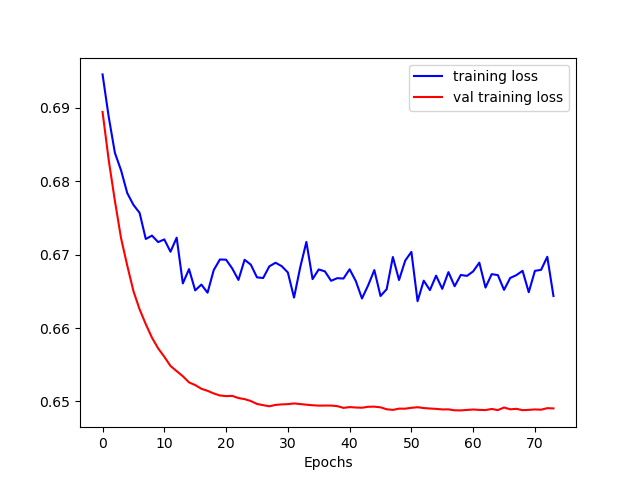

Text(0.5, 0, 'Epochs')

In [46]:
# plot training loss and validation split loss 
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.xlabel('Epochs')

<IPython.core.display.Javascript object>


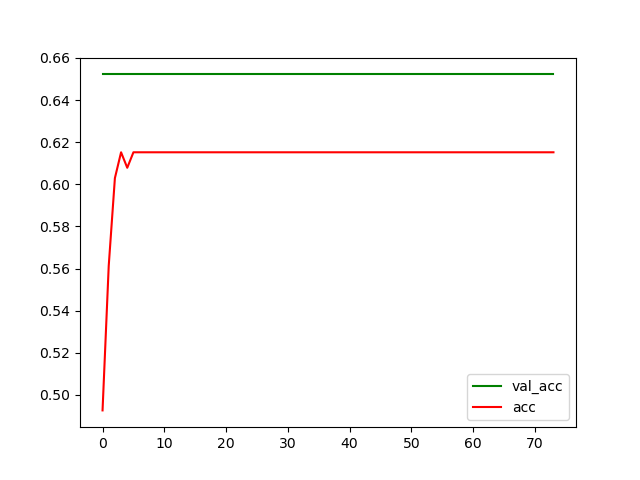

In [47]:
# plot accuracy
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.figure()
plt.plot(val_accuracy_values, '-g', label='val_acc')
plt.plot(accuracy_values, '-r', label='acc')
plt.legend()

In [48]:
# calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, accuracy = model.evaluate(x_test, y_test_cat)
print('Test loss: ', loss)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6228
Test loss:  0.6628231406211853
Test Accuracy: 0.6228070259094238


In [49]:
# define a deep softmax regression model with batch normalization
model = Sequential()
model.add(Dense(16,input_shape=(30,), activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(16, activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(16, activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(16, activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [50]:
# assign an earlystopper
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1,mode='auto')
history = model.fit(x_train, y_train_cat, epochs=3000, validation_split=0.1, shuffle = True, verbose=1, callbacks=[earlystopper])
history_dict=history.history

Epoch 1/3000
13/13 [==============================] - 0s 19ms/step - loss: 0.7912 - accuracy: 0.5000 - val_loss: 0.6862 - val_accuracy: 0.6522
Epoch 2/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.5784 - val_loss: 0.6761 - val_accuracy: 0.6522
Epoch 3/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5588 - val_loss: 0.6699 - val_accuracy: 0.6522
Epoch 4/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.6054 - val_loss: 0.6646 - val_accuracy: 0.6522
Epoch 5/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6275 - val_loss: 0.6606 - val_accuracy: 0.6522
Epoch 6/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.6593 - val_loss: 0.6576 - val_accuracy: 0.6522
Epoch 7/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.6765 - val_loss: 0.6557 - val_accuracy: 0.6522
Epoch

13/13 [==============================] - 0s 3ms/step - loss: 0.4870 - accuracy: 0.7794 - val_loss: 0.7002 - val_accuracy: 0.6087
Epoch 59/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.7549 - val_loss: 0.7131 - val_accuracy: 0.6304
Epoch 60/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.4922 - accuracy: 0.7598 - val_loss: 0.6990 - val_accuracy: 0.6304
Epoch 00060: early stopping


<IPython.core.display.Javascript object>


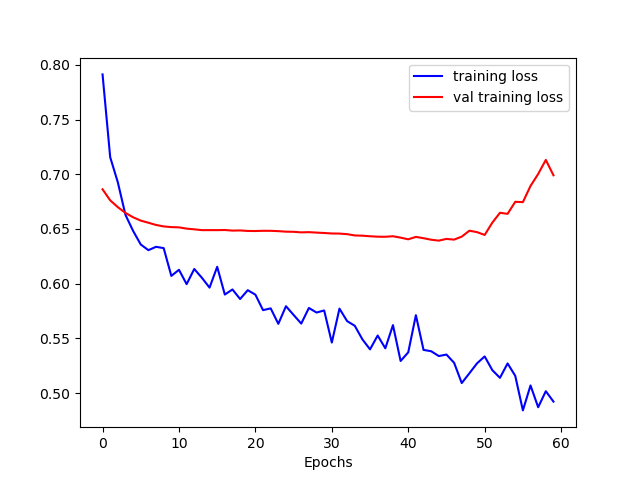

Text(0.5, 0, 'Epochs')

In [51]:
# plot training loss and validation split loss 
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.xlabel('Epochs')

<IPython.core.display.Javascript object>


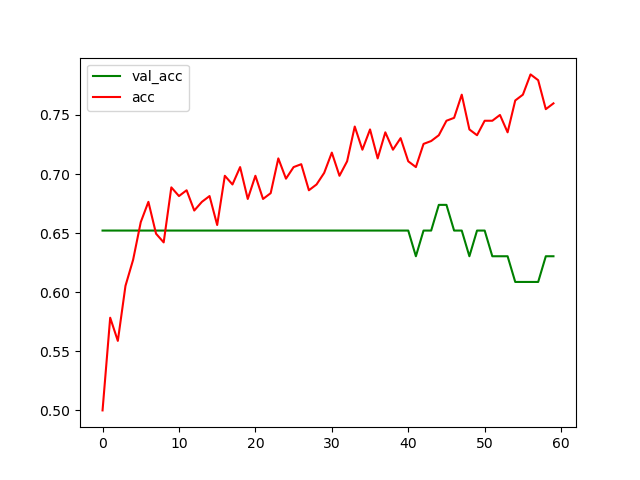

In [52]:
# plot accuracy
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.figure()
plt.plot(val_accuracy_values, '-g', label='val_acc')
plt.plot(accuracy_values, '-r', label='acc')
plt.legend()

In [53]:
# calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, accuracy = model.evaluate(x_test, y_test_cat)
print('Test loss: ', loss)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.5702
Test loss:  0.8505053520202637
Test Accuracy: 0.5701754093170166


In [56]:
# a deep softmax regression model with kernel regularizer
model = Sequential()
model.add(Dense(16,input_shape=(30,), activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(16, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(16, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(16, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(16, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [57]:
# assign an earlystopper
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1,mode='auto')
history = model.fit(x_train, y_train_cat, epochs=3000, validation_split=0.1, shuffle = True, verbose=1, callbacks=[earlystopper])
history_dict=history.history

Epoch 1/3000
13/13 [==============================] - 0s 13ms/step - loss: 0.6969 - accuracy: 0.6152 - val_loss: 0.6905 - val_accuracy: 0.6522
Epoch 2/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.6152 - val_loss: 0.6843 - val_accuracy: 0.6522
Epoch 3/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.6152 - val_loss: 0.6790 - val_accuracy: 0.6522
Epoch 4/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.6152 - val_loss: 0.6741 - val_accuracy: 0.6522
Epoch 5/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6152 - val_loss: 0.6699 - val_accuracy: 0.6522
Epoch 6/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.6152 - val_loss: 0.6667 - val_accuracy: 0.6522
Epoch 7/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.6152 - val_loss: 0.6638 - val_accuracy: 0.6522
Epoch

13/13 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6152 - val_loss: 0.6496 - val_accuracy: 0.6522
Epoch 59/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6152 - val_loss: 0.6494 - val_accuracy: 0.6522
Epoch 60/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6152 - val_loss: 0.6495 - val_accuracy: 0.6522
Epoch 61/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6152 - val_loss: 0.6498 - val_accuracy: 0.6522
Epoch 62/3000
13/13 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6152 - val_loss: 0.6498 - val_accuracy: 0.6522
Epoch 63/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6152 - val_loss: 0.6498 - val_accuracy: 0.6522
Epoch 64/3000
13/13 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6152 - val_loss: 0.6495 - val_accuracy: 0.6522
Epoch 65/3000

<IPython.core.display.Javascript object>


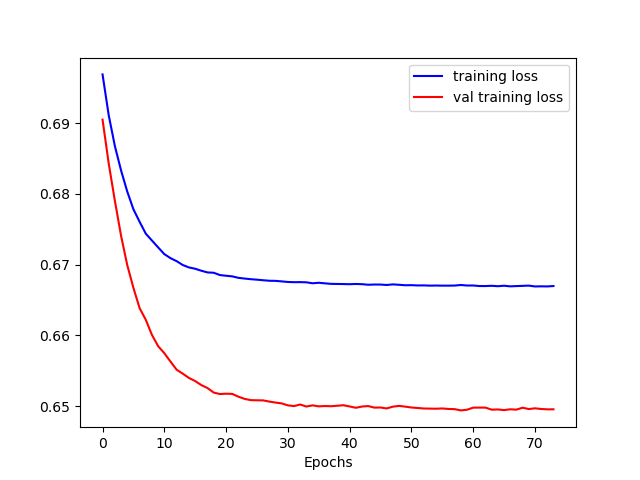

Text(0.5, 0, 'Epochs')

In [58]:
# plot training loss and validation split loss 
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.xlabel('Epochs')

<IPython.core.display.Javascript object>


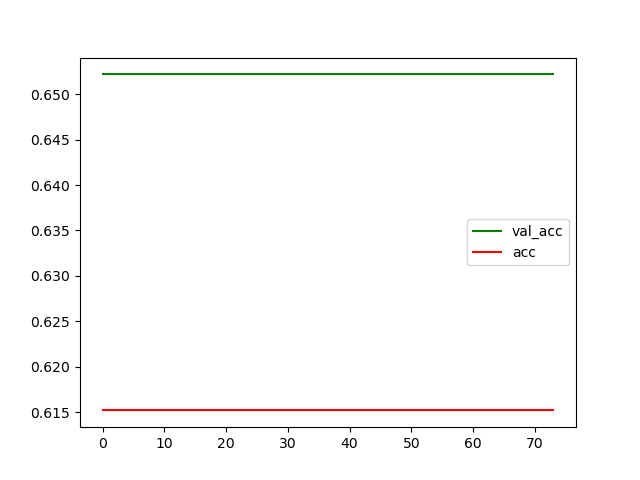

In [59]:
# plot accuracy
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.figure()
plt.plot(val_accuracy_values, '-g', label='val_acc')
plt.plot(accuracy_values, '-r', label='acc')
plt.legend()

In [60]:
# calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, accuracy = model.evaluate(x_test, y_test_cat)
print('Test loss: ', loss)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6228
Test loss:  0.6633214354515076
Test Accuracy: 0.6228070259094238
